In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import xarray as xr
import datetime as dt
import calendar
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

In [5]:
def set_monsoon_area(dataarray, method='IPCC', hemisphere='SH'):
    if method == 'IPCC':
        dataoutput = dataarray
        if hemisphere == 'SH':
            mask_lat = (dataarray.lat < 0)
            mask_summer = ((dataoutput.time.dt.month == 11) + (dataoutput.time.dt.month == 12) +
                           (dataoutput.time.dt.month == 1)+ (dataoutput.time.dt.month == 2) +
                           (dataoutput.time.dt.month == 3))
            monthly_days_summer = 30.25
            mask_winter = ((dataoutput.time.dt.month == 5) + (dataoutput.time.dt.month == 6) +
                           (dataoutput.time.dt.month == 7) + (dataoutput.time.dt.month == 8) +
                           (dataoutput.time.dt.month == 9))
            monthly_days_winter = 30.6
        elif hemisphere == 'NH':
            mask_lat = (dataarray.lat > 0)
            mask_summer = ((dataoutput.time.dt.month == 5) + (dataoutput.time.dt.month == 6) +
                           (dataoutput.time.dt.month == 7) + (dataoutput.time.dt.month == 8) +
                           (dataoutput.time.dt.month == 9))
            monthly_days_summer = 30.6
            mask_winter = ((dataoutput.time.dt.month == 11) + (dataoutput.time.dt.month == 12) +
                           (dataoutput.time.dt.month == 1)+ (dataoutput.time.dt.month == 2) +
                           (dataoutput.time.dt.month == 3))
            monthly_days_winter = 30.25
        difference = ((dataoutput.where(mask_summer).mean(dim='time') / monthly_days_summer)  - 
                       (dataoutput.where(mask_winter).mean(dim='time') / monthly_days_winter))
        monsoon_area = difference.where(mask_lat).where(difference > 2.5)
        mask_monsoon = monsoon_area.notnull()
        # GMP = xr.ones(mask_monsoon)
    # elif method == 'Hsu':
    #     if hemisphere
    return monsoon_area, mask_monsoon# , GMP

def ploteo_general(dataarray, title=None, vmin=None, vmax=None, projection=ccrs.PlateCarree(), figsize=(20,10),
                   extend='max'):
    plt.figure(figsize=(figsize))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ploteo = dataarray.plot(vmin=vmin, vmax=vmax, extend=extend, ax=ax)
    cmap = ploteo.get_cmap()
    cmap.set_under('w')
    ax.coastlines()
    plt.title(title)
    ax.add_feature(cfeature.BORDERS)
    return ax



In [24]:
def load_mask(dataarray):
    mask_ndjfm = ((dataarray.time.dt.month == 11) + (dataarray.time.dt.month == 12) +
                        (dataarray.time.dt.month == 1) + (dataarray.time.dt.month == 2) +
                        (dataarray.time.dt.month == 3))
    mask_mjjas = ((dataarray.time.dt.month == 5) + (dataarray.time.dt.month == 6) +
                        (dataarray.time.dt.month == 7) + (dataarray.time.dt.month == 8) +
                        (dataarray.time.dt.month == 9))
    return mask_ndjfm, mask_mjjas

In [2]:
# Open files
pr_c5_hist = xr.open_mfdataset('NorESM1-M/pr_Amon_NorESM1-M_historical_*_197601-200512_2.5_mes.nc',
                                 combine='nested', concat_dim='ensemble')
pr_c5_26_close = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp26_r1i1p1_202001-204912_2.5_mes.nc')
pr_c5_85_close = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp85_r1i1p1_202001-204912_2.5_mes.nc')
pr_c5_26_far = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp26_r1i1p1_207001-209912_2.5_mes.nc')
pr_c5_85_far = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp85_r1i1p1_207001-209912_2.5_mes.nc')

pr_c6_hist = xr.open_mfdataset('NorESM2-LM/pr_Amon_NorESM2-LM_historical_r*_2.5_mes.nc',
                                 combine='nested', concat_dim='ensemble')
pr_c6_126_close = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5_mes.nc')
pr_c6_126_far = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5_mes.nc')

ua_c6_hist = xr.open_mfdataset('NorESM2-LM/ua850_Amon_NorESM2-LM_historical_r*_2.5.nc',
                             combine='nested', concat_dim='ensemble')
ua_c6_126_close = xr.open_dataset('NorESM2-LM/ua850_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5.nc')
ua_c6_126_far = xr.open_dataset('NorESM2-LM/ua850_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5.nc')
ua_c6_585_close = xr.open_dataset('NorESM2-LM/ua850_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5.nc')
ua_c6_585_far = xr.open_dataset('NorESM2-LM/ua850_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5.nc')

va_c6_hist = xr.open_mfdataset('NorESM2-LM/va850_Amon_NorESM2-LM_historical_r*_2.5.nc',
                             combine='nested', concat_dim='ensemble')
va_c6_126_close = xr.open_dataset('NorESM2-LM/va850_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5.nc')
va_c6_126_far = xr.open_dataset('NorESM2-LM/va850_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5.nc')
va_c6_585_close = xr.open_dataset('NorESM2-LM/va850_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5.nc')
va_c6_585_far = xr.open_dataset('NorESM2-LM/va850_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5.nc')

t_c5_hist = xr.open_mfdataset('NorESM1-M/tas_Amon_NorESM1-M_historical_*_197601-200512_2.5_anu.nc',
                              combine='nested', concat_dim='ensemble')
t_c6_hist = xr.open_mfdataset('NorESM2-LM/tas_Amon_NorESM2-LM_historical_r*_2.5.nc',
                              combine='nested', concat_dim='ensemble')
t_c5_26_close = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp26_r1i1p1_202001-204912_2.5_anu.nc')
t_c5_26_far = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp26_r1i1p1_207001-209912_2.5_anu.nc')
t_c5_85_close = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp85_r1i1p1_202001-204912_2.5_anu.nc')
t_c5_85_far = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp85_r1i1p1_207001-209912_2.5_anu.nc')
t_c6_126_close = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5.nc')
t_c6_126_far = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5.nc')
t_c6_585_close = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5.nc')
t_c6_585_far = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5.nc')

h_c5_hist = xr.open_mfdataset('NorESM1-M/huss_Amon_NorESM1-M_historical_r*_197601-200512_2.5_anu.nc',
                              combine='nested', concat_dim='ensemble')
h_c6_hist = xr.open_mfdataset('NorESM2-LM/huss_Amon_NorESM2-LM_historical_r*_2.5.nc',
                              combine='nested', concat_dim='ensemble')
h_c5_26_close = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp26_r1_202001-204912_2.5_anu.nc')
h_c5_26_far = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp26_r1_207001-209912_2.5_anu.nc')
h_c5_85_close = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp85_r1_202001-204912_2.5_anu.nc')
h_c5_85_far = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp85_r1_202001-204912_2.5_anu.nc')
h_c6_126_close = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5.nc')
h_c6_126_far = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5.nc')
h_c6_585_close = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5.nc')
h_c6_585_far = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5.nc')



In [98]:
u_summer = ua_c6_hist.ua.where(load_mask(ua_c6_hist)[0]).mean(dim='ensemble').isel(plev=0)
v_summer = va_c6_hist.va.where(load_mask(va_c6_hist)[0]).mean(dim='ensemble').isel(plev=0)
u_winter = ua_c6_hist.ua.where(load_mask(ua_c6_hist)[1]).mean(dim='ensemble').isel(plev=0)
v_winter = va_c6_hist.va.where(load_mask(va_c6_hist)[1]).mean(dim='ensemble').isel(plev=0)

print(u)
uvel_summer, lonu = add_cyclic_point(u_summer, coord=u_summer.lon)
vvel_summer, lonv = add_cyclic_point(v_summer, coord=v_summer.lon)
uvel_winter, lonu = add_cyclic_point(u_winter, coord=u_winter.lon)
vvel_winter, lonv = add_cyclic_point(v_winter, coord=v_winter.lon)
field, lon = add_cyclic_point(pr_c5_hist.mean(dim=('ensemble', 'time')).pr, 
                              coord=pr_c5_hist.mean(dim=('ensemble', 'time')).lon)
lonu = np.where(lonu>=180.,lonu-360.,lonu)

#fig = plt.figure(figsize=(12, 12))
#
#cf = ax.contourf(lon, pr_c5_hist.mean(dim=('ensemble', 'time')).lat, field, 
#                 levels=np.arange(0, 1, 0.1),
#                 cmap='RdYlBu_r',
#                 extend='both',
#                 transform=ccrs.PlateCarree())
## create axis with subplot a project
crs_latlon = ccrs.PlateCarree()
#ax = fig.add_subplot(1, 1, 1, projection=crs_latlon)
#ax.set_extent([-180, 180. , -85, 0], crs=crs_latlon)
#ax.coastlines('50m')
#
##sp = ax.streamplot(lonu, pr_c5_hist.mean(dim=('ensemble', 'time')).lat, uvel, vvel,
##                   linewidth=0.2,
##                   arrowsize = 0.2,
##                   density=5,
#                   color='k',
#                   transform=ccrs.PlateCarree())

<xarray.DataArray 'ua' (time: 360, lat: 73, lon: 144)>
dask.array<getitem, shape=(360, 73, 144), dtype=float32, chunksize=(360, 73, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1976-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
    plev     float64 8.5e+04


/home/tobi/programs/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/tobi/programs/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/tobi/programs/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/tobi/programs/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/tobi/programs/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/tobi/programs/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encoun

<class 'numpy.ma.core.MaskedArray'>


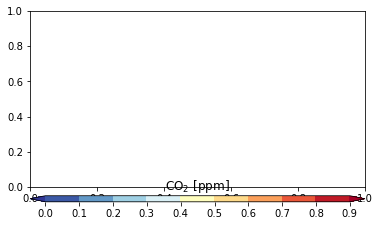

In [97]:
cb = plt.colorbar(cf,orientation='horizontal', pad=-1.04, aspect=50)
cb.ax.set_title('CO$_2$ [ppm]');
#u[0,0][0::2, 0::2].shape
#print(v)
#print(u)
print(type(uvel))

In [25]:
u1 = ua_c6_hist.mean(dim='ensemble').isel(plev=0)
u1.ua.where(load_mask(u1)[0])

<xarray.DataArray 'ua' (time: 360, lat: 73, lon: 144)>
dask.array<where, shape=(360, 73, 144), dtype=float32, chunksize=(360, 73, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1976-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
    plev     float64 8.5e+04

N° celdas histórico 
1191


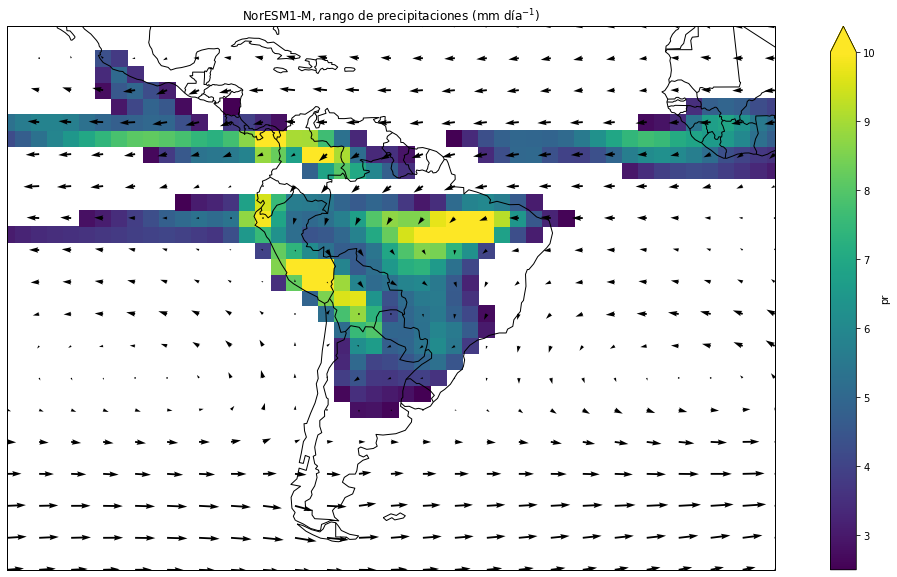

N° celdas histórico 
1191


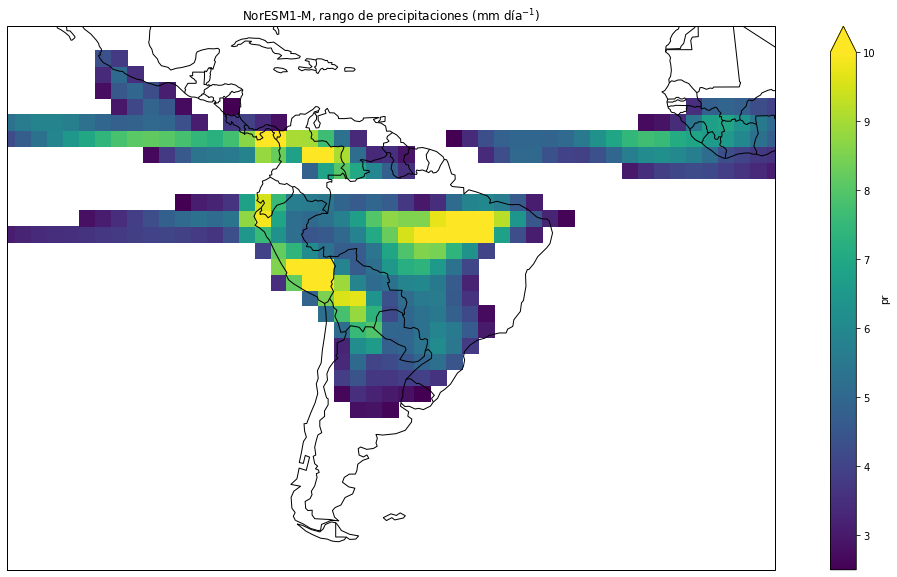

N° celdas RCP 26:
1250


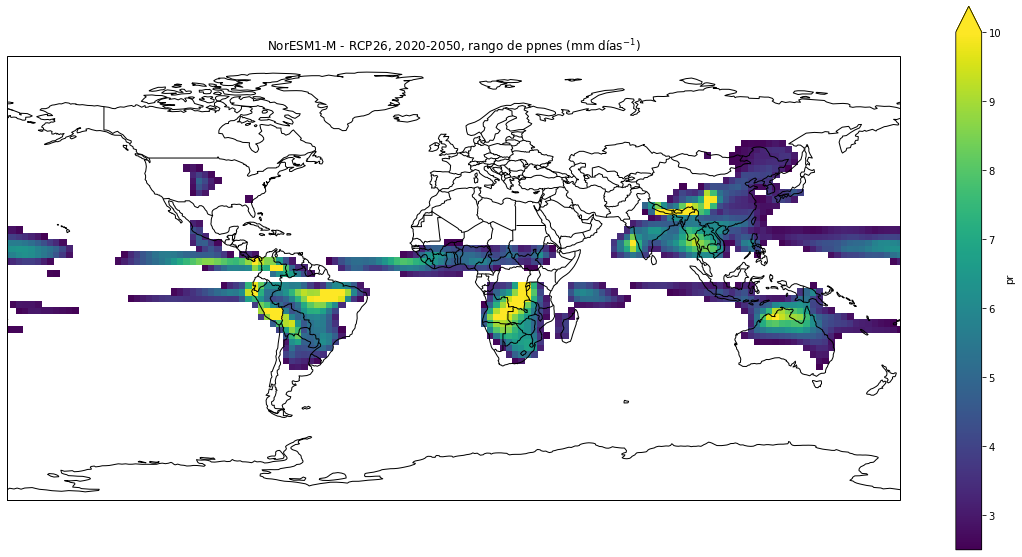

N° celdas RCP 85:
1232


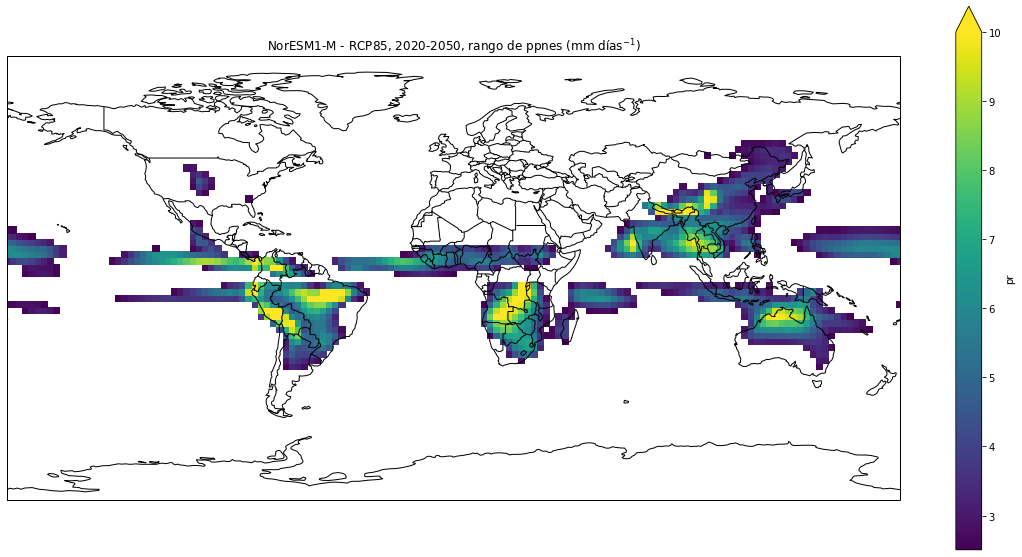

N° celdas RCP 26:
1217


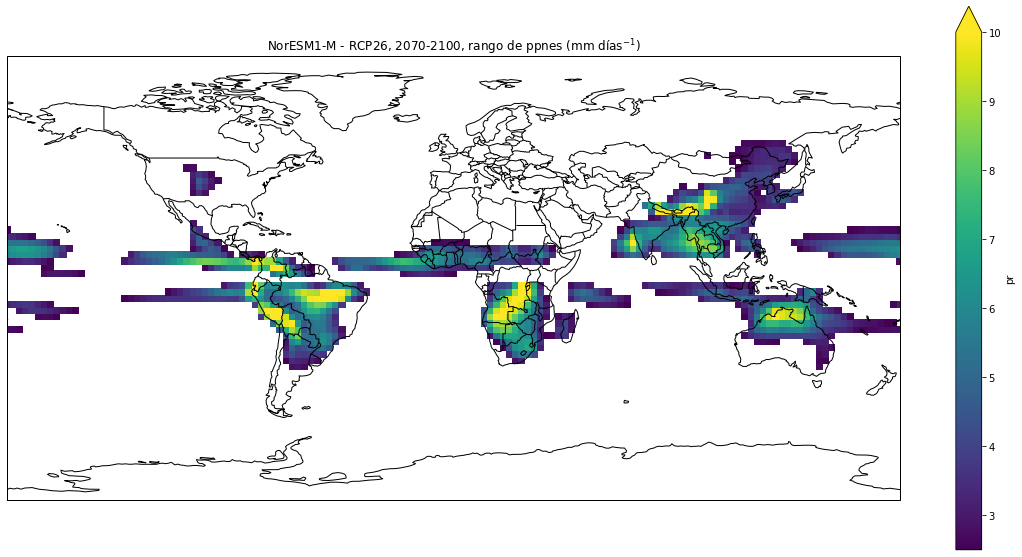

N° celdas RCP 85:
1316


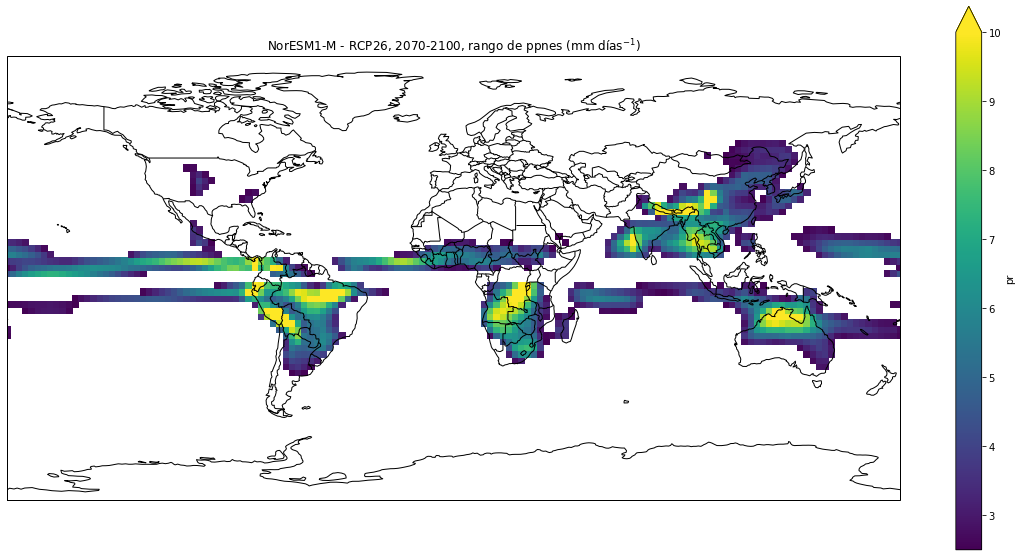

In [96]:
monsoon_sh_hist, area_sh_hist = set_monsoon_area(pr_c5_hist.pr.mean(dim='ensemble')) 
monsoon_nh_hist, area_nh_hist = set_monsoon_area(pr_c5_hist.pr.mean(dim='ensemble'), hemisphere='NH')
ax = ploteo_general(monsoon_sh_hist.combine_first(monsoon_nh_hist), vmax=10,
               title='NorESM1-M, rango de precipitaciones (mm día$^{-1}$)')
ax.set_extent([-120, 0, -60, 25], crs=crs_latlon)
ax.quiver(u.lon[0::2], u.lat[0::2], u.where(load_mask(u)[0]).mean(dim='time')[0::2, 0::2],
                                            v.where(load_mask(v)[0]).mean(dim='time')[0::2, 0::2])
print('N° celdas histórico ')
print((area_nh_hist + area_sh_hist).sum().values)
plt.show()

####
monsoon_sh_hist, area_sh_hist = set_monsoon_area(pr_c5_hist.pr.mean(dim='ensemble'))
monsoon_nh_hist, area_nh_hist = set_monsoon_area(pr_c5_hist.pr.mean(dim='ensemble'), hemisphere='NH')
ax = ploteo_general(monsoon_sh_hist.combine_first(monsoon_nh_hist), vmax=10,
               title='NorESM1-M, rango de precipitaciones (mm día$^{-1}$)')
ax.set_extent([-120, 0, -60, 25], crs=crs_latlon)
ax.streamplot(lonu, u.lat, uvel_summer.mean(axis=0), vvel_summer.mean(axis=0), color='k')
#ax.streamplot(lonu, u.lat, uvel_winter.mean(axis=0), vvel_winter.mean(axis=0), color='r')
print('N° celdas histórico ')
print((area_nh_hist + area_sh_hist).sum().values)
plt.show()

####

monsoon_sh_26_close, area_sh_26_close = set_monsoon_area(pr_c5_26_close.pr)
monsoon_nh_26_close, area_nh_26_close = set_monsoon_area(pr_c5_26_close.pr, hemisphere='NH')
ploteo_general(monsoon_sh_26_close.combine_first(monsoon_nh_26_close), vmax = 10,
               title='NorESM1-M - RCP26, 2020-2050, rango de ppnes (mm días$^{-1}$)')
print('N° celdas RCP 26:')
print((area_nh_26_close + area_sh_26_close).sum().values)
plt.show()

#####

monsoon_sh_85_close, area_sh_85_close = set_monsoon_area(pr_c5_85_close.pr)
monsoon_nh_85_close, area_nh_85_close = set_monsoon_area(pr_c5_85_close.pr, hemisphere='NH')
ploteo_general(monsoon_sh_85_close.combine_first(monsoon_nh_85_close), vmax = 10,
               title='NorESM1-M - RCP85, 2020-2050, rango de ppnes (mm días$^{-1}$)')
print('N° celdas RCP 85:')
print((area_nh_85_close + area_sh_85_close).sum().values)
plt.show()

#####

monsoon_sh_26_far, area_sh_26_far = set_monsoon_area(pr_c5_26_far.pr)
monsoon_nh_26_far, area_nh_26_far = set_monsoon_area(pr_c5_26_far.pr, hemisphere='NH')
ploteo_general(monsoon_sh_26_far.combine_first(monsoon_nh_26_far), vmax = 10,
               title='NorESM1-M - RCP26, 2070-2100, rango de ppnes (mm días$^{-1}$)')
print('N° celdas RCP 26:')
print((area_nh_26_far + area_sh_26_far).sum().values)
plt.show()

#####

monsoon_sh_85_far, area_sh_85_far = set_monsoon_area(pr_c5_85_far.pr)
monsoon_nh_85_far, area_nh_85_far = set_monsoon_area(pr_c5_85_far.pr, hemisphere='NH')
ploteo_general(monsoon_sh_85_far.combine_first(monsoon_nh_85_far), vmax = 10,
               title='NorESM1-M - RCP26, 2070-2100, rango de ppnes (mm días$^{-1}$)')
print('N° celdas RCP 85:')
print((area_nh_85_far + area_sh_85_far).sum().values)
plt.show()

In [8]:
monsoon_sh_hist, area_sh_hist = set_monsoon_area(pr_c6_hist.pr.mean(dim='ensemble'))
monsoon_nh_hist, area_nh_hist = set_monsoon_area(pr_c6_hist.pr.mean(dim='ensemble'), hemisphere='NH')
ploteo, ax = ploteo_general(monsoon_sh_hist.combine_first(monsoon_nh_hist), vmax=10),
                             title='NorESM2-LM, rango de precipitaciones (mm día$^{-1}$)')
print('N° celdas histórico ')
print((area_nh_hist + area_sh_hist).sum().values)
plt.show()

####

monsoon_sh_126_close, area_sh_126_close = set_monsoon_area(pr_c6_126_close.pr)
monsoon_nh_126_close, area_nh_126_close = set_monsoon_area(pr_c6_126_close.pr, hemisphere='NH')
ploteo_general(monsoon_sh_126_close.combine_first(monsoon_nh_126_close), vmax = 10,
               title='NorESM2-LM - SSPS126, 2020-2050, rango de ppnes (mm días$^{-1}$)')
print('N° celdas SSPS 126:')
print((area_nh_126_close + area_sh_126_close).sum().values)
plt.show()

#####


#####

monsoon_sh_126_far, area_sh_126_far = set_monsoon_area(pr_c6_126_far.pr)
monsoon_nh_126_far, area_nh_126_far = set_monsoon_area(pr_c6_126_far.pr, hemisphere='NH')
ploteo_general(monsoon_sh_126_far.combine_first(monsoon_nh_126_far), vmax = 10,
               title='NorESM2-LM - SSPS126, 2070-2100, rango de ppnes (mm días$^{-1}$)')
print('N° celdas SSPS 126:')
print((area_nh_126_far + area_sh_126_far).sum().values)
plt.show()

#####


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 14)

In [ ]:
# ########### Con rolling average
# average_c5_hist =  pr_c5_hist.pr.mean(dim='ensemble').rolling(time=5)
# average_c5_hist = average_c5_hist.reduce(np.std)
# plt.figure(figsize=(20,10))
# ax = plt.axes(projection=ccrs.PlateCarree())
# difference_NH = ((average_c5_hist.where(average_c5_hist.time.dt.month == 7)/153).mean(dim='time') - (
#                  (average_c5_hist.where(average_c5_hist.time.dt.month == 1)/151).mean(dim='time')))
# difference_NH.plot(axes = ax, vmin=1, vmax=3)
# ax.coastlines()
# ax.add_feature(cfeature.BORDERS)
# 

In [ ]:
ploteo_general(h_c5_hist.huss.mean(dim=('ensemble', 'time')).where(area_sh_hist == 1))
print(h_c5_hist.huss)